# Lab 10 (due Dec. 5)

**Last, First**

**NetID**

Double click this text cell to edit it. Replace the lines above with your own name and netID.   

Press `Shift` + `Enter` to exit editing mode. 

# Your Toolkit 
The cell below loads various libraries and tools that you will need in this lab. You need to run it once before you run the code of your problems.


In [1]:
#################################
# import packages 
#################################

# plotting tools 
import numpy as np
import matplotlib.pyplot as plt
# reading data from url
import urllib.request
# natural language processing toolking   
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
# tools for working with CSV files 
import csv


#################################
# download data  
#################################

# 2012 SAT scores, by school
!wget https://data.cityofnewyork.us/api/views/f9bf-2cp4/rows.csv
!mv rows.csv SAT_2012.csv



[nltk_data] Downloading package stopwords to /home/asia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/asia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
--2018-11-27 09:33:10--  https://data.cityofnewyork.us/api/views/f9bf-2cp4/rows.csv
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.140.199, 52.206.68.26, 52.206.140.205
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv’

rows.csv                [ <=>                ]  27.67K  --.-KB/s    in 0s      

Last-modified header invalid -- time-stamp ignored.
2018-11-27 09:33:11 (138 MB/s) - ‘rows.csv’ saved [28339]



## Problem 1: Letter Count (30 points) 


Write a program that counts occurrences of all letters in a book. You should NOT be 
keeping counters for every letter. Instead, you should work with two lists: one that contains the letters and one 
that contains the counts. Your `for` loops will need to iterate over indexes in these two arrays.

The program should open a book given a specific URL (some example URL's are
listed below). 

For each letter, the program should display the percentage of times that the letter occurs in the text. (You
will need to keep track of the total number of letters in the text - this does not include the spaces, punctuation marks, digits or any other non-letter characters.)  Make sure that both upper and lowercase letters are
counted. 

The results should be displayed one per line:

 LETTER: PERCENTAGE
 
Here is a sample output:

    a: 7.64
    b: 1.63
    c: 2.42
    d: 3.67
    e: 12.09
    f: 1.98
    g: 1.87
    h: 5.98
    i: 6.61
    j: 0.31
    k: 0.80
    l: 4.51
    m: 3.05
    n: 6.22
    o: 8.34
    p: 1.67
    q: 0.06
    r: 6.32
    s: 6.09
    t: 9.28
    u: 3.48
    v: 1.01
    w: 2.36
    x: 0.13
    y: 2.44
    z: 0.03

__Extra credit (5 points) __

In addition to the above, produce a bar graph showing the visual representation of the results. 

The following short program shows how to generate a bar graph for a simple data set of three elements:

    import numpy as np
    import matplotlib.pyplot as plt

    names = ["Joanna", "Barbara", "Alice"]
    winnings = [19342.00, 23009.00, 15900.00]

    plt.bar(names, winnings) 

    plt.show()
Use it as a guide for how to write your own code that displays the percentages associated with each letter. 


Use the CODE cell below to continue with your program. 

a: 7.64
b: 1.63
c: 2.42
d: 3.67
e: 12.09
f: 1.98
g: 1.87
h: 5.98
i: 6.61
j: 0.31
k: 0.80
l: 4.51
m: 3.05
n: 6.22
o: 8.34
p: 1.67
q: 0.06
r: 6.32
s: 6.09
t: 9.28
u: 3.48
v: 1.01
w: 2.36
x: 0.13
y: 2.44
z: 0.03


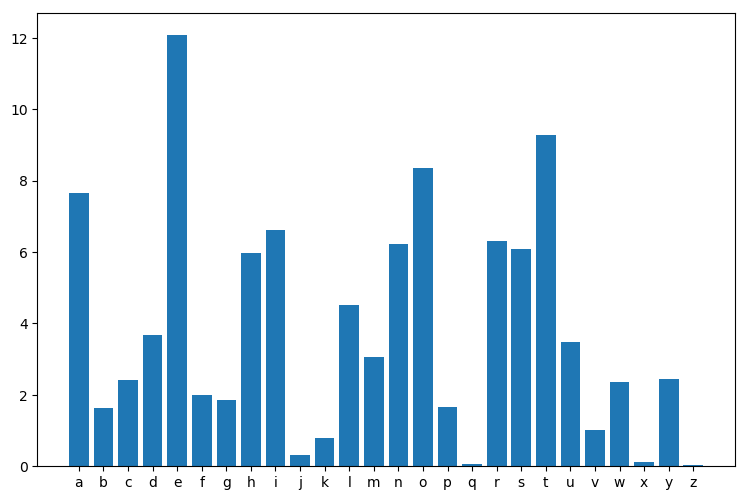

In [2]:
# Uncomment the link for the book that you want to access. 
# (You can add other books, if you want. )

# Romeo and Juliet (English) 
url="http://www.gutenberg.org/files/1513/1513-0.txt" 

# Romeo and Juliet (Polish) 
# url="http://www.gutenberg.org/files/27062/27062-0.txt" 

# Romeo and Juliet (German) 
# url="http://www.gutenberg.org/cache/epub/6996/pg6996.txt" 

# Romeo and Juliet (Tagalog) 
# url="http://www.gutenberg.org/cache/epub/15418/pg15418.txt" 


# connect to the requested URL
response = urllib.request.urlopen(url)

# save the text of the book into the variable called text 
text = response.read().decode('utf-8')


# use the text variable from above, this is the text of the entire book 

counters = [0]* (ord('z')-ord('a')+1)

letters = 0

for c in text:
    c = c.lower()
    if c >= 'a' and c <= 'z':
        letters += 1
        index = ord(c) - ord('a') 
        counters[index] += 1 

let = [] 
for index in range(len(counters) ) :
    let.append(chr(index+ord('a')))
    counters[index] = counters[index] / letters * 100 
    print (let[index], ": ", format(counters[index],'.2f'), sep="")



import numpy as np
import matplotlib.pyplot as plt


#finally, plot the graph and show it 
plt.figure(figsize=(9,6), dpi=100)
plt.bar(let,counters) 

plt.show()


## Problem 2: Dale-Chall Readability Test (35 points) 


Write a program that performs the Dale-Chall Readability Test on a given text. 

Recall that for this test you will need 
* the list of 3000 'easy' words
* the total number of words in the text
* the total number of sentences in the text 
(Use the nltk package that we used in class to get the individual words and sentences of the book.) 

You can read the file containing all of the easy words at 
https://joannakl.github.io/core109_f17/slides/week10/easy_words.txt

The program below  

The program should display the results using the following format:

    Dale-Chall score: 7.496281677488893
    easily understood by an average 9th or 10th-grade student


Continue your program in the cell below. The code there opens the file with easy words and saves those words in a list called `easy_words`. It also  starts with several url's for books. 
Your program should run with one of those url's at a time. The text of the book is stored in the variable
called `text`. (Feel free to add your own as well.) 

Use the class notes for more details about how the Dale-Chall score is calculated.  

In [3]:
# read the easy words 
url_words = "https://joannakl.github.io/core109_f17/slides/week10/easy_words.txt"
response = urllib.request.urlopen(url_words)
easy_words_text = response.read().decode('utf-8')
# easy_words is a list of all the words considered to be
# easy for the Dale-Chall test
easy_words = easy_words_text.split() 



# read the text 

# Romeo and Juliet (English) 
# url="http://www.gutenberg.org/files/1513/1513-0.txt" 

# Ulysses by James Joyce 
# url = "https://www.gutenberg.org/ebooks/4300" 

# Pride and Prejudice by Jane Austen 
url = "https://www.gutenberg.org/files/1342/1342-0.txt" 

# War and Peace
# url = "http://www.gutenberg.org/files/2600/2600-0.txt"


url = "https://www.gutenberg.org/files/46/46-0.txt"

# connect to the requested URL
response = urllib.request.urlopen(url)

# save the text of the book into the variable called text 
# (this also converts all the letters to lowercase and replaces newlines with spaces)
text = response.read().decode('utf-8').replace("\n", " ").lower()




# break the text of the book into individual words/tokens
words = word_tokenize(text )

# make a copy of the words and call it clean_words
clean_words = words[0:]

# get the list of stop words from the nltk 
stop_words = stopwords.words('english')

for word in words:
  # remove all stop words and word's consisting 
  # of non-letters from the clean_words list 
  if word in stop_words or not word.isalpha()  :
    clean_words.remove(word)
      
book_words = clean_words
 


# count total number of words 
words_total = len(book_words)

# count hard words 
hard_words_total = 0
for word in book_words:
    if word not in easy_words:
        hard_words_total += 1 
        
# count sentences

book_sentences = sent_tokenize(text)
sentence_total = len(book_sentences) 

print (hard_words_total, words_total, sentence_total)

dale_chall_score = 0.1579 * (100 * hard_words_total/words_total) + \
        0.0496 * (words_total / sentence_total) 
        
print ("Dale-Chall score:", dale_chall_score) 

if dale_chall_score <= 4.9 :
    print("easily understood by an average 4th-grade student or lower")
elif dale_chall_score <= 5.9:
    print("easily understood by an average 5th or 6th-grade student")
elif dale_chall_score <= 6.9:
    print("easily understood by an average 7th or 8th-grade student") 
elif dale_chall_score <= 7.9:
    print("easily understood by an average 9th or 10th-grade student") 
elif dale_chall_score <= 8.9:
    print("easily understood by an average 11th or 12th-grade student") 
elif dale_chall_score <= 9.9:
    print("easily understood by an average 13th to 15th-grade (college) student") 
else: 
    print ("hard to understand!") 

6761 14962 2055
Dale-Chall score: 7.496281677488893
easily understood by an average 9th or 10th-grade student


## Problem 3: SAT Scores (35 points) 


Write a program that uses the 2012 SAT scores files from the NYC Open Data site to determine all the NYC schools in which at least 100 students took the test and where the average writing score is at least 600. 
The program should display all the highschools that meet with criteria using the following format: 

    DBN: 01M696
    SCHOOL NAME: BARD HIGH SCHOOL EARLY COLLEGE
    Num of SAT Test Takers: 130
    SAT Critical Reading Avg. Score: 624
    SAT Math Avg. Score: 604
    SAT Writing Avg. Score: 628

(Note that there are several schools that meet this criteria.) 

Continue your program in the cell below. The code there opens the file that contains the data and creates a reader that can be used to process it.
Use the notes from the last class for more information on how to use the CSV reader. 


In [5]:
file = open('SAT_2012.csv', "r")
reader = csv.reader(file)
 

MATH_AVERAGE = 4 
WRITING_AVE = 5
TEST_TAKERS = 2

results = []

rownum = 0
for row in reader:
    
    if rownum == 0:
        header = row
    if rownum != 0  and row[WRITING_AVE].isdigit() and  int(row[WRITING_AVE]) >= 600 \
        and row[TEST_TAKERS].isdigit() and int(row[TEST_TAKERS])>=100 :
        
        results.append(row) 
    rownum += 1
 

for row in results: 
    colnum = 0
    for col in row :
        print( header[colnum]+":", col )
        colnum += 1
    print()


DBN: 01M696
SCHOOL NAME: BARD HIGH SCHOOL EARLY COLLEGE
Num of SAT Test Takers: 130
SAT Critical Reading Avg. Score: 624
SAT Math Avg. Score: 604
SAT Writing Avg. Score: 628

DBN: 02M475
SCHOOL NAME: STUYVESANT HIGH SCHOOL
Num of SAT Test Takers: 832
SAT Critical Reading Avg. Score: 679
SAT Math Avg. Score: 735
SAT Writing Avg. Score: 682

DBN: 10X445
SCHOOL NAME: BRONX HIGH SCHOOL OF SCIENCE
Num of SAT Test Takers: 731
SAT Critical Reading Avg. Score: 632
SAT Math Avg. Score: 688
SAT Writing Avg. Score: 649

DBN: 25Q525
SCHOOL NAME: TOWNSEND HARRIS HIGH SCHOOL
Num of SAT Test Takers: 278
SAT Critical Reading Avg. Score: 621
SAT Math Avg. Score: 651
SAT Writing Avg. Score: 638

DBN: 31R605
SCHOOL NAME: STATEN ISLAND TECHNICAL HIGH SCHOOL
Num of SAT Test Takers: 227
SAT Critical Reading Avg. Score: 635
SAT Math Avg. Score: 682
SAT Writing Avg. Score: 636

